# Программирование на языке Python. Уровень 1. Основы языка Python

## Модуль 9. Работа с файлами

- Работа с содержимым файлов
- Манипуляция с файлами и путями (копирование, удаление, модификация метаданных)

### Работа с содержимым файлов

Для чтения и записи файлы открываются функцией ```open(  file_name, mode )```. Функция возвращает объект.

```file_name``` - имя файла

```mode``` - режим работы с файлом (флаги, отмеченные __полужирным__, указывать обязательно):
- '__r__': только чтение (default)
- '__w__': запись ”с ноля” (содержимое файла будет стерто)
- '__x__': создать (если файл существует, будет выброшено исключение)
- '__a__': запись в конец файла
- 'b': «бинарный» режим
- 't': «текстовый режим» (default)
- '+': доступ и на запись, и на чтение.


У объекта file есть следующие методы:
 - ```read( size )``` - прочитать содержимое файла размером size байтов/символов
 - ```readline()``` - прочитать строку и передвинуть указатель на следующую
 - ```readlines()``` - вернуть список строк
 - ```write()``` - запись в файл, функция возвращает количество прочитанных символов
 - ```seek( offset, whence )``` - перемещает указатель файла на offset байт в зависимости от позиции whence: 0 - от начала, 1 - от текущей позиции, 2 - с конца файла. Offset может быть отрицательным.
 - ```tell()``` - возвращает текущую позицию в байтах, от начала файла
 - ```truncate( bytes )``` - сократить размер файла до ```bytes``` байт, либо по текущую позицию.
 
 
Файл закрывается методом ```close()```.

По умолчанию файлы открываются в текстовом режиме.
 


In [ ]:
# просто открыли файл, прочитали его содержимое, закрыли
file1 = open('files1.txt', 'r')
file1_contents = file1.read()
file1.close()

print(file1_contents)

Файлы также можно открывать в бинарном (binary) или байт-режиме. Для этого в параметр ```mode``` функции ```open( filename, mode)``` нужно добавить букву "__b__". Тогда все операции чтения будут возвращать байт-строки (строки, которые начинаются на ```b"...```). Один символ в такой строке равен одному байту, и все байты, которые выходят за семибитную границу таблицы ASCII, будут отображаться в шестнадцатеричном представлении ```\xd0\xad...```.

In [ ]:
file1 = open('files1.txt', 'rb')
file1_contents = file1.read()
file1.close()

print(file1_contents)

Чтобы расшифровать такие строки (привести их к читабельному виду), нам понадобится модуль ```codecs```:

In [ ]:
import codecs

Процесс расшифровки выглядит следующим образом: 
 - нужно в модуле ```codecs``` функцией ```lookup()``` подобрать соответствующий кодек (в данном случае мы имеем дело с кодировкой ```utf-8```, в настоящее время это самая распространенная кодировка, остальные - ```windows-1251```, ```koi8-r``` и т.д. - почти не используются);
 - затем нужно вызвать метод кодека ```decode()``` и передать ему байт-строку;
 - метод вернет кортеж из "обычной" строки и кол-ва декодированных байт.
 
Обратный процесс выполняется с помощью функции ```encode()``` соответствующего кодека.

In [ ]:
file1 = open('files1.txt', 'rb')
file1_contents_b = file1.read()
file1.close()

print(file1_contents_b)

print('---')

# декодируем бинарную строку
utf8 = codecs.lookup('utf-8')
(file1_contents_t_b, _) = utf8.decode(file1_contents_b)
print(file1_contents_t_b)

In [ ]:
file_utf8 = open('files1.txt', 'r', encoding='utf8')
print(file_utf8.read())
file_utf8.close()

Файлы, с которыми работает программа, не принято держать постоянно открытыми. Если мы хотим что-либо записать в файл, мы подготавливаем данные и записываем их в файл, после этого закрываем его. Если мы хотим что-то прочитать из файла, мы сначала читаем данные, закрываем файл, а потом уже их обрабатываем.

Рекомендуется использовать оператор контекста ```with ... as ...:```.


In [ ]:
with open('files1.txt', 'r', encoding='utf8') as file_utf8:
    print(file_utf8.read())

### Работа с данными в файлах

Существует три способа работы с данными в файлах:
1. __Чтение/запись файлов целиком__ (небольшие бинарные или текстовые данные)
2. __Порционная работа с данными__ - фиксированными или заданными фрагментами (большие бинарные файлы (напр., видео) или "большие данные")
3. __Чтение файлов построчно__ ("журналы доступа", "логи" и пр., как правило машинно сгенерированные данные)

<div style="float:right;">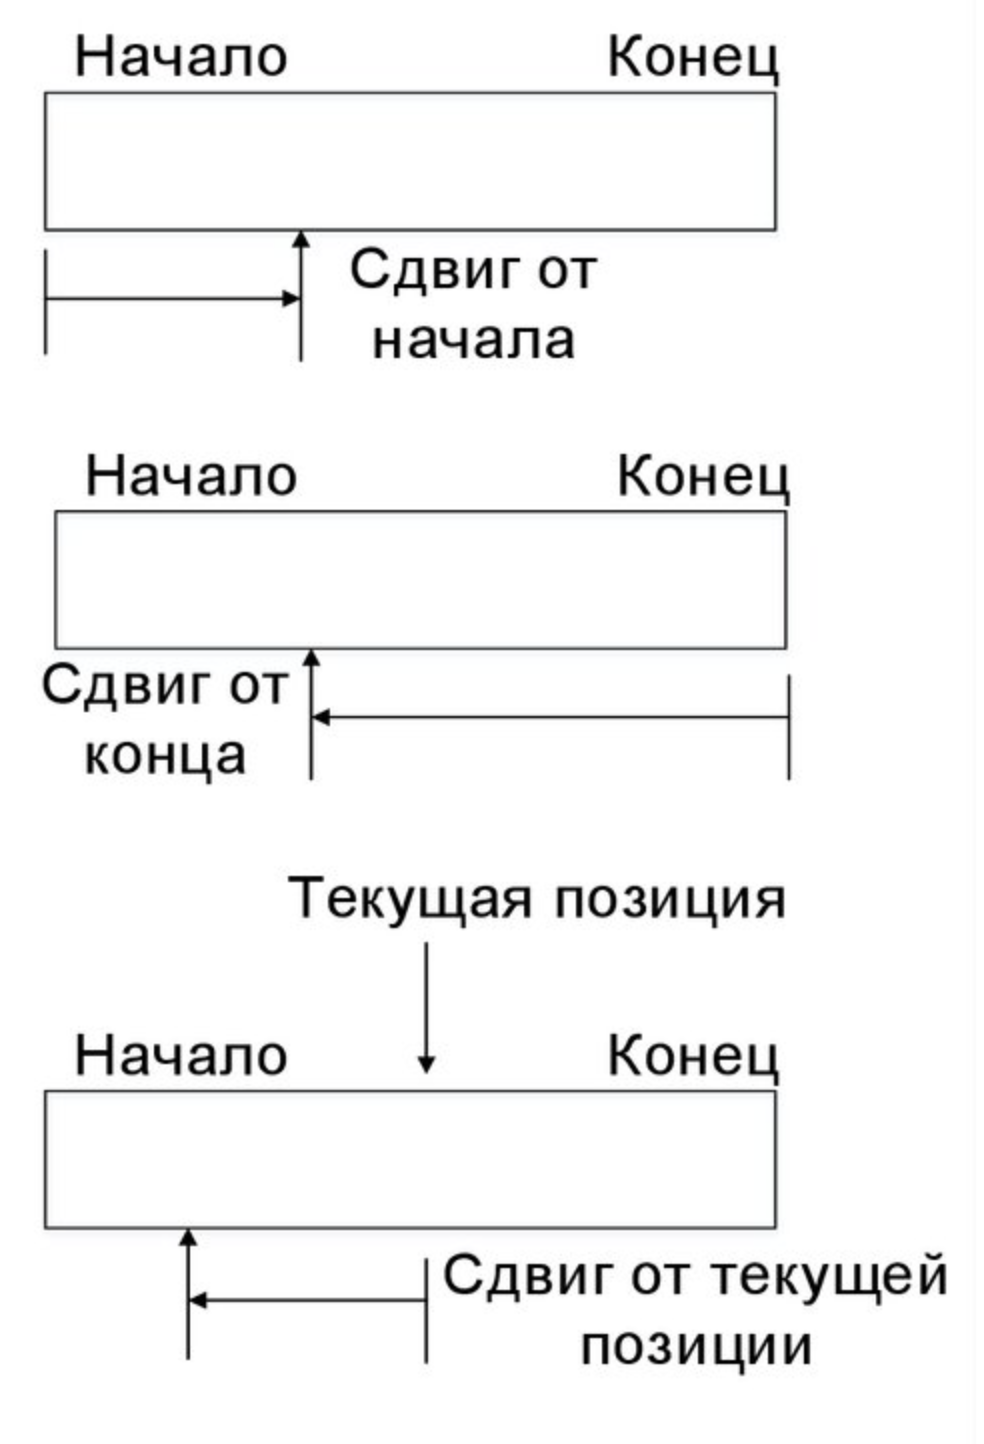</div>

### "Порционное" чтение данных - указатель файла

Указатель (или курсор) можно перемещать по файлу, используя функцию ```seek( offset, whence )```. Параметр ```offset``` не может быть отрицательным, при попытке выйти за границы файла будет выброшено исключение.

Узнать позицию указателя от начала файла можно при помощи функции ```tell()```.

- При открытии файлов с флагами ```r```, ```w```, ```x``` указатель устанавливается на начало файла
- При открытии файла с флагом ```a``` - указатель устанавливается на конец файла.




In [ ]:
with open('files1.txt', 'r', encoding='utf8') as f:
    
    print(f.read(28)) # прочитаем 28 символов
    
    pos = f.tell() # запомним позицию после операции чтения
    
    for i in range(4):   # вот так можно прочитать n порций данных в цикле for
        print(f.read(3), end='')
    
#     f.seek(-4, 1) # будет ошибка, т.к. смещение отрицательно
    f.seek(pos)  # чтобы вернуться назад, нужно указать "запомненную" позицию
    
    print('\n')
    print(f.read( 12 ))
    print('\n')
    
    # а вот так можно прочитать весь файл порциями по n байтов в цикле while
    f.seek(0) # перемотаем на начало
    buf = None
    while buf!='':
        buf = f.read(10)
        print(buf, end='')
    

### Чтение файлов построчно

In [ ]:
with open('files1.txt', 'r', encoding='utf8') as f:
    
    # читаем и печатаем построчно
    for line in f:
        print(line) # выводит лишние строки, потому что символ новой строки "\n" не отсекается
    
    # попробуем еще раз, другим способом
    for _ in range(5):
        print(f.readline()) #выводит 5 пустых строк, почему?
        
    # и еще раз, перед этим файл "перемотаем" на начало методом seek()
    f.seek(0)
    for _ in range(5):
        print(f.readline().rstrip()) # rstrip() отсекает символ новой строки
        
    # строки можно получить списком
    f.seek(0)
    lines = f.readlines()
    print(lines) # обратите внимание на символы новой строки '\n'    


### Запись в файл, запись в середину файла
 

In [ ]:
# Запишем в файл:
with open('files2.txt', 'w') as f:
    f.write("Hi from Python")
    
# Дополним:
with open('files2.txt', 'a') as f:
    f.write("Hi from Python again")
    
# Посмотрим:
with open('files2.txt', 'r') as f:
    print(f.read()) # Hi from PythonHi from Python again - строки склеились, что делать?
    
# Добавим символ новой строки
with open('files2.txt', 'rb+') as f:
    str1 = "Hi from Python"
    pos = f.seek(len(str1))
    str2 = f.read()
    f.seek(pos)
    f.write(b'\n') # в таком режиме нужно писать в файл байтовые строки
    f.write(str2)
    f.seek(0)
    for line in f:
        print( line.rstrip() )
#         b'Hi from Python' - обратите внимание: прочитали мы тоже байтовые строки
#         b'Hi from Python again'    

In [ ]:
# Удаление из файла
# создадим файл из 4-х строк:
with open('files3.txt', 'w+') as f:
    f.writelines(st+'\n' for st in ["Строка 1", "Строка 2", "Строка 3", "Строка 4"])
    f.seek(0)
    print(f.read())
    
# строка 3, допустим, лишняя, удалим:
with open('files3.txt', 'r+') as f:
    lines = f.readlines() # прочитаем все строки
    del lines[2] # удалим 3-ю
    f.seek(0) # перемотаем
    f.writelines(lines) # запишем оставшиеся строки, указатель встанет в конце файла
    pos = f.tell() # запомним позицию
    
    # напечатаем, что получается
    f.seek(0); print(f.read()); # строка 4 задвоилась, потому что мы удалили строку 3, 
        # а длину файла не скорректировали
    
    f.truncate( pos ) # "обрежем" файл по сохраненной позиции
    f.seek(0)
    print(f.read()) # готово
    
    
            

### __ПРАКТИКА__

1. Определите, есть ли во входном файле files_excersize01.txt символ '@'. Выведите слово YES и позицию этого символа или NO. \
Входной файл может быть очень большим, поэтому считывать файл нужно посимвольно.

In [ ]:
# ваш код здесь

2. Во входном файле  files_excersize02.txt записаны две цифры, которые могут быть разделены пробелами и концами строк. Выведите в выходной файл их сумму.


In [ ]:
# ваш код здесь

### Манипуляции с атрибутами файлов

In [ ]:
# проверка файла перед операцией над ним:

# есть такой файл или нет:
file_name = 'abyrvalg.txt'
try:
    ff = open("abyrvalg.txt", "r")
except FileNotFoundError:
    print(f"File {file_name} not found!")
else:
    ff.close()

# если не хочется использовать try...except:
import os

print( 'File exists' if os.path.exists('files1.txt') else 'File not found')
    

# пермиссии
file_name = 'files2.txt'
with open(file_name, 'a') as f: # поиграйте с флагами, посмотрите, как изменится вывод
    print("File {} is {}".format(file_name, 'readable' if f.readable() else 'NOT readable'))
    print("File {} is {}".format(file_name, 'writable' if f.writable() else 'NOT writable'))
    

In [ ]:
# Как узнать о файле всё, не открывая его

import os
import datetime
import pwd, grp

o = os.stat('files1.txt')

print(f"{o.st_size} bytes") # - размер в байтах

print(datetime.datetime.fromtimestamp(o.st_atime)) # - дата/время последнего доступа,
print(datetime.datetime.fromtimestamp(o.st_mtime)) # -  дата последнего изменения,
print(datetime.datetime.fromtimestamp(o.st_ctime)) # - в зависимости от платформы: в UNIX
                                                #  апдейт метаданных, в Windows - время создания)


print(f"Owner: {pwd.getpwuid(o.st_uid).pw_name} ({o.st_uid})") # - имя и user id владельца,
print(f"Group: {grp.getgrgid(o.st_gid).gr_name} ({o.st_gid})") # - название и group id владельца,
print(oct(o.st_mode)) # биты прав доступа в восьмеричной системе



In [ ]:
# изменение даты модификации файла

filename = 'files4.txt'

with open(filename, 'w+') as f:
    f.write('hello from the future')
    
ts_mtime = os.stat(filename).st_mtime

ts_mtime += 3600 # добавим час

os.utime(filename, (ts_mtime, ts_mtime))

print(datetime.datetime.fromtimestamp( os.stat(filename).st_mtime ))

In [ ]:
# копирование, переименование и удаление файлов
import shutil

# копирование
shutil.copy('files4.txt', 'files4_copy.txt')

In [ ]:
# перемещение / переименование
shutil.move('files4_copy.txt', 'files4_moved.txt')

In [ ]:
# удаление
os.unlink('files4_moved.txt')

### Пути и операции с путями

Используйте функции и переменные из модуля os:
- ```os.getcwd()``` - возвращает путь к текущей папке
- ```os.path.isfile( path )``` - True, если по данному пути - файл
- ```os.path.isdir( path )``` - True, если по данному пути - директория
- ```os.path.exists(path)``` Возвращает True, если указанный файл или папка существует.
- ```os.sep``` - разделитель имен директорий в пути: "/" или "\\"
- ```normpath(path)``` Возвращает «нормализованный» путь к файлу. В нормализованном пути удалены «циклические» пути — например, путь A/foo/../B превращается в A/B.
- ```os.path.abspath(path)``` Преобразует относительный путь в абсолютный, считая относительный путь от текущей рабочей папки.
- ```os.path.relpath(path)``` Преобразует абсолютный путь в относильный, считая последний от текущей рабочей папки.
- ```os.path.split(path)``` Возвращает кортеж, первый элемент которого — путь к папке, а второй — имя файла.
- ```os.path.splitdrive(path)``` Возвращает кортеж, первый элемент которого — буква устройства, а второй — путь к файлу внутри устройства.
- ```os.path.splitext(path)``` Возвращает кортеж, второй элемент которого — расширение файла (с точкой), а первый — все остальное.
- ```os.path.join(path1,path2,path3,...)``` «Склеивает» путь к файлу из заданных частей, вставляя между ними символ- разделитель папок, принятый в данной операционной системе.

In [ ]:
import os

# Текущий каталог
cwd = os.getcwd()
print(cwd)

print("Path {} is {}".format(cwd, 'directory' if os.path.isdir(cwd) else ' a file'))
print(os.path.normpath('A/foo/../B'))
print(os.path.abspath('../Python2'))
print(os.path.relpath('/Users'))
print(os.path.split(cwd))
print(os.path.splitext('myfile.ext'))

print(os.path.join('this', 'is', 'my', 'path', 'to', 'the', 'file'))

#### Рекурсивный обход директорий

Иногда возникает необходимость рекурсивно перебрать все файлы и папки, находящиеся внутри заданной папки. Для этого служит генератор-функция ```os.walk()```. Эта функция принимает параметр — путь к папке, которую необходимо просмотреть. На каждом шаге итерации функция возвращает кортеж ```(path,dirs,files)``` из трех элементов:
- ```path``` — пусть к папке, в которую мы только что зашли;
- ```dirs``` — список папок, непосредственно содержащихся в папке path (но
не в ее подпапках);
- ```files``` — список файлов, непосредственно содержащихся в папке path, но не в ее подпапках.
Например, чтобы вывести полный список файлов и папок, содержащихся в
папке выше по уровню относительно текущей, можно так:

In [ ]:
import os

for ( path, dirs, files ) in os.walk( '../' ) :
    print(path)
    for file in files :
        print(os.path.join( path, file ))

### __ПРАКТИКА__

Обойти содержимое папки "Мои документы" (все папки, рекурсивно) и сложить их содержимое (имена файлов с путями) в файл mycomputer.txt в текущую директорию.

In [ ]:
for ( path, dirs, files ) in os.walk( 'C:\\Users\\--user--\\Documents' ):
    ### print(path)
    for file in files :
        ### print(os.path.join( path, file ))
        pass
    